# Matrix Decompositions

## Decompositions Related to Solving Linear Systems
A fundamental problem in linear algebra is solving the linear system $Ax=b$, if it is even possible. In this section, we will implement two versions of the LU algorithm and demonstrate how to use numpy to run other decomposition methods.

### LU Decomposition (Version 1)

**Pseudocode for LU_decomposition()**
1. m, n = shape(A) - *get the shape of A*
2. U = copy(A) - *create a copy of A using np.copy()*
3. L = $I_{m}$ - *initialize L with the mxm identity matrix*
4. for $j$ from $0$ to $n-1$: - iterate over the columns of A
    1. for $i$ from $j+1$ to $m-1$:
        1. $L_{i,j} \leftarrow U_{i,j}/U{j,j}$
        2. $U_{i,j:} \leftarrow U_{i,j:} - L_{i,j}U_{j,j:}$
5. Return L, U

<div class="alert alert-success">
Exercise:
Implement the first version of the LU decomposition.
</div>

In [3]:
import numpy as np

In [157]:
def LU_decomposition(A):
    m, n = A.shape
    U = np.copy(A)
    L = np.eye(m)
    for j in range(n):
        for i in range(j+1, m):
            L[i,j] = U[i,j]/U[j,j]
            U[i,j:] = U[i,j:] - L[i,j]*U[j,j:]
    return L, U

In [174]:
A = np.random.randn(4, 3)
A

array([[-0.39687564, -1.83202965, -1.04254954],
       [-1.37355399, -1.89716651,  0.64301641],
       [ 1.07428979,  1.25122254, -0.92463865],
       [ 0.68574158,  0.33813202,  0.16070706]])

In [175]:
L, U = LU_decomposition(A)
print(L)
print()
print(U)

[[ 1.          0.          0.          0.        ]
 [ 3.46091789  1.          0.          0.        ]
 [-2.70686756 -0.8344716   1.          0.        ]
 [-1.72785003 -0.63631006 -5.34396507  1.        ]]

[[-0.39687564 -1.83202965 -1.04254954]
 [ 0.          4.44333767  4.25119475]
 [ 0.          0.         -0.19918091]
 [ 0.          0.          0.        ]]


In [176]:
np.sum(L.dot(U) - A)

-1.942890293094024e-16

### Fast LU Decomposition via *Vectorization*
In our first LU Decomposition algorithm, notice that we had a loop inside a loop. One way to speed up the computation is by the use of **vectorization**. Simply put, vectorization means taking advantage of vectors to perform parallel computations instead of iterating over each entry in the vector.

In [177]:
def LU_decomposition2(A):
    m, n = A.shape
    U = np.copy(A)
    L = np.eye(m)
    for k in range(n):
        L[k+1:,k] = U[k+1:,k]/U[k,k]
        U[k+1:,k:] = U[k+1:,k:] - np.outer(L[k+1:,k], U[k,k:].T)
    return L, U

#### Why outer product?

<img src='sketch.jpg' width=700>

In [178]:
L, U = LU_decomposition(A)
np.sum(L.dot(U) - A)

-1.942890293094024e-16

In [179]:
L2, U2 = LU_decomposition2(A)
np.sum(L2.dot(U2) - A)

-1.942890293094024e-16

### Scipy Matrix Decomposition and Linear System Solvers

In [180]:
from scipy import linalg

#### LU Decomposition

In [181]:
# Generate a random matrix and a random vector
A = np.random.random((10, 10))
b = np.random.random(10)

# Compute the LU decomposition of A and Pivots
lu, piv = la.lu_factor(A)

In [182]:
l = np.tril(lu) - np.eye(10)*np.diag(lu)
u = np.triu(lu)

In [183]:
# Find the solution x to Ax = b
x = linalg.lu_solve((lu, piv), b)
x

array([-1.41802988,  0.32762664, -0.37877547,  0.87210117, -0.27060565,
       -1.87328167,  1.48328509,  0.21500981,  1.58569565,  0.42518822])

### QR Decomposition

In [184]:
# get values for Q and R
Q, R = linalg.qr(A)

# create new variable y
y = Q.T.dot(b)

# Solve the equivalent problem to Ax = b
x = linalg.solve(R, y) # Solve Rx = y
x

array([-1.41802988,  0.32762664, -0.37877547,  0.87210117, -0.27060565,
       -1.87328167,  1.48328509,  0.21500981,  1.58569565,  0.42518822])

In [185]:
y

array([-1.19142062, -0.51739354, -0.10551422,  0.29050734, -0.08815646,
       -0.37702235,  0.03702731,  0.16622414, -0.35166671,  0.07481356])

### Cholesky Decomposition

In [186]:
A = np.array([[9, 3, 1, 5],
              [3, 7, 5, 1],
              [1, 5, 9, 2],
              [5, 1, 2, 6]])

b = np.array([1, 1, 1, 1])

# c, low = cho_factor(A)
# x = cho_solve((c, low), [1, 1, 1, 1])
# np.allclose(A @ x - [1, 1, 1, 1], np.zeros(4))
c, low = linalg.cho_factor(A)
x = linalg.cho_solve((c, low), b)
x

array([-0.01749271,  0.11953353,  0.01166181,  0.1574344 ])

## Other Linear Algebra Routines in Scipy

```Python
det() - determinant of a square matrix
eig() - eigenvalues and eigenvectors of a square matrix
inv() - inverse of an invertible matrix
norm() - norm of a matrix or vector
```

## Singular Value Decomposition (SVD)

SVD is an incredibly useful matrix factorization that is widely used in both theoretical and applied mathematics. The beauty of SVD is that it makes it easy to select information that is most important. Larger singular values corresponds to more informative columns in the matrix factors. 

#### Schmidt, Mirsky, Echart-Young Theorem
Given any matrix A, its rank $s$ approximation $A_s$ is the best rank $s$ approximation of A with respect to both the induced 2-norm and Frobenius norm. This concept is so useful that it appears in singal processing, statistics, machine learning, semantic indexing (think of search engines), and control theory.

Relevant Wikipedia Page [here](https://en.wikipedia.org/wiki/Low-rank_approximation)

### Compact SVD Algorithm

**Pseudocode for compact_svd(A)**
1. $\lambda, V = eig(A^{H}A)$ - Ah here represents the Hermitian of A which can be computed with A.conj().T
1. $\sigma \leftarrow \sqrt{\lambda}$
1. $\sigma \leftarrow \text{sort}(\sigma)$ - sort values from highest to lowest
1. $V \leftarrow \text{sort}(V)$ - sort eigenvectors same way as previous step
1. $r \leftarrow count(\sigma \ne 0)$ - count the number of nonzero singular values (the rank of A)
1. $\sigma_{new} = \sigma_{:r}$ - only keep the positive singular values
1. $V_{new} = V_{:, :r}$ - only keep corresponding eigenvectors
1. $U_{new} = AV_{new}/\sigma_{new}$
1. return $U_new, \sigma_{new}, V^{H}_{new}$

In [190]:
# Problem 1
def compact_svd(A, tol=1e-6):
    eigs, eigsv = linalg.eigh(A.conj().T.dot(A))
    sig = np.sqrt(eigs)
    
    # index for sorting
    idx = np.argsort(sig)[::-1]
    
    # sort sigma and V
    sig = sig[idx]
    V = eigsv[idx]
    
    # counter for nonzeroes
    r = len(sig[sig > tol])
    
    # update sigma and V
    sig_, V_ = sig[:r], V[:,:r]
    
    # compute U
    U_ = A.dot(V_)/sig_
    return U_, sig_, V_.conj().T

In [191]:
U, sig, Vh = compact_svd(A)

In [192]:
U

array([[ 0.12105162,  0.46697691,  1.10502277, -7.68528219],
       [ 0.05687691,  0.14959787, -1.07414915, -7.14030811],
       [ 0.12551819, -0.35408441, -1.16334361, -7.74387143],
       [ 0.02785157,  0.03643242,  1.07784662, -6.20177702]])

In [193]:
sig

array([16.40234669,  9.55408093,  3.92957693,  1.11399545])

In [194]:
Vh

array([[ 0.57956795, -0.39880928,  0.49848052, -0.50652672],
       [ 0.58035059,  0.43995116, -0.61982187, -0.29233034],
       [ 0.39455433, -0.61099505, -0.34427146,  0.59370792],
       [-0.41427173, -0.52352573, -0.49881378, -0.55270658]])

### SVD Demo (Image Compression)

In [198]:
import scipy.misc as misc
import matplotlib.pyplot as plt

%matplotlib inline

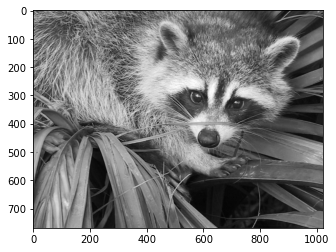

In [255]:
# Load the Lena Image
img = misc.face().mean(axis=2)
m, n = img.shape

# Display the original
plt.imshow(img, cmap='gray')

In [256]:
# get svd decomposition
U, s, Vh = linalg.svd(img)

In [257]:
U.shape

(768, 768)

In [258]:
s.shape

(768,)

In [259]:
Vh.shape

(1024, 1024)

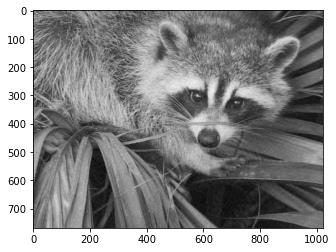

In [260]:
rank = 100
U_ = U[:, :rank]
s_ = s[:rank]
Vh_ = Vh[:rank, :]

img_recon = U_.dot(np.diag(s_)).dot(Vh_)
plt.imshow(img_recon, cmap='gray')